In [17]:
pip install prophet

     |████████████████████████████████| 6.8 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 187 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 81 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 17.0 MB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=060d81d0f5715f2f22460bf00291ccff3277c0849bd8501312f6002ee8f35f15
  Stored in directory: /Users/aramvandeneynde/Library/Caches/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [103]:
data = pd.read_csv("cycling_Auckland/cycling_counts_by_day.csv");

In [104]:
data.rename(columns = {"datetime":"ds", "Tamaki Drive EB":"y"}, inplace=True)
data.head()

,ds,y
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0


In [105]:
data["ds"] = pd.to_datetime(data["ds"])

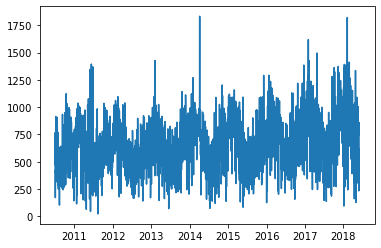

In [106]:
plt.plot(data["ds"], data["y"])

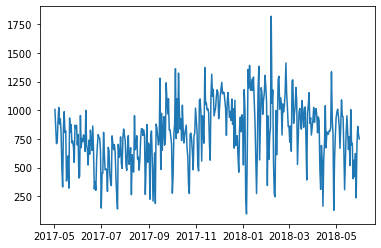

In [107]:
plt.plot(data.loc[data["ds"]  > "2017-05", "ds"], data.loc[data["ds"] > "2017-05", "y"])

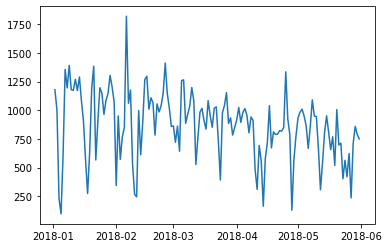

In [108]:
plt.plot(data.loc[data["ds"]  > "2018", "ds"], data.loc[data["ds"] > "2018", "y"])

In [109]:
test = data.loc[data["ds"] >= "2018"]
train = data.loc[data["ds"] < "2018"]

In [110]:
m = Prophet()
m.fit(train)

14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
test.shape

(151, 2)

In [112]:
future = m.make_future_dataframe(periods = 151)

In [113]:
forecast = m.predict(future)

In [114]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-01,608.013320,152.018358,636.643740,608.013320,608.013320,-212.255387,-212.255387,-212.255387,-10.980532,-10.980532,-10.980532,-201.274855,-201.274855,-201.274855,0.0,0.0,0.0,395.757933
1,2010-07-02,608.010104,97.415059,591.647967,608.010104,608.010104,-256.464282,-256.464282,-256.464282,-52.540649,-52.540649,-52.540649,-203.923633,-203.923633,-203.923633,0.0,0.0,0.0,351.545822
2,2010-07-03,608.006888,163.897118,660.423901,608.006888,608.006888,-194.846124,-194.846124,-194.846124,11.003787,11.003787,11.003787,-205.849911,-205.849911,-205.849911,0.0,0.0,0.0,413.160764
3,2010-07-04,608.003672,200.434864,654.510805,608.003672,608.003672,-184.837994,-184.837994,-184.837994,22.207173,22.207173,22.207173,-207.045167,-207.045167,-207.045167,0.0,0.0,0.0,423.165678
4,2010-07-05,608.000456,127.424235,612.772905,608.000456,608.000456,-234.187607,-234.187607,-234.187607,-26.671344,-26.671344,-26.671344,-207.516263,-207.516263,-207.516263,0.0,0.0,0.0,373.812848


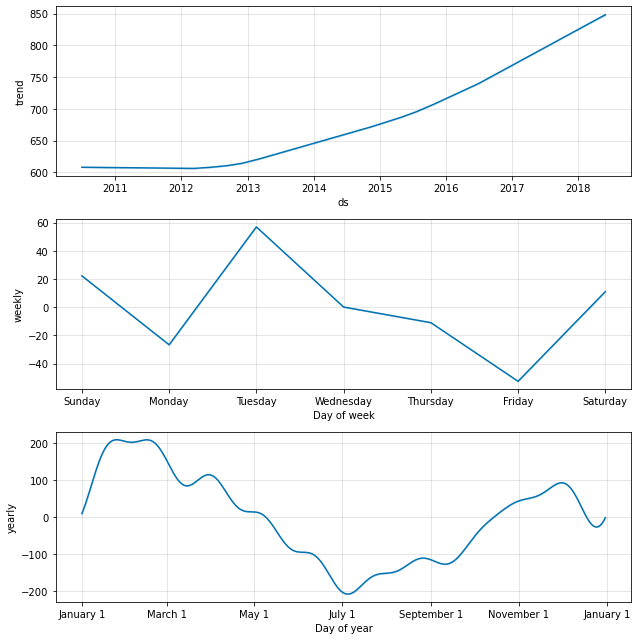

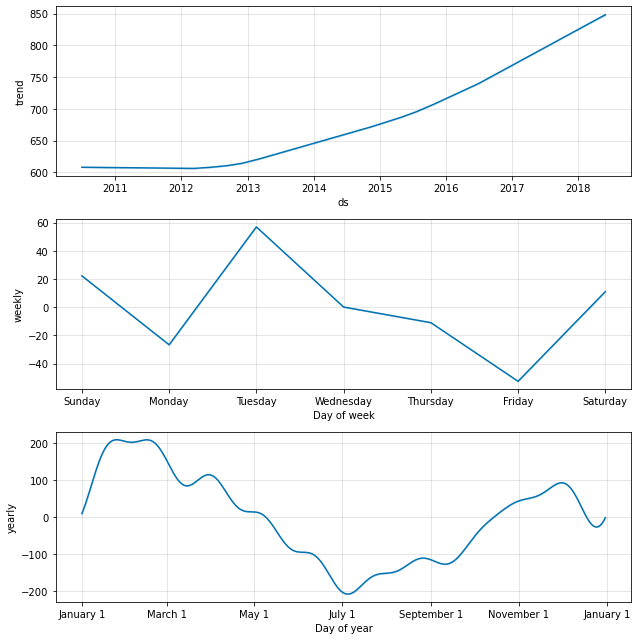

In [115]:
m.plot_components(forecast)

In [116]:
forecast["truth"] = data["y"]

In [117]:
test_forecast = forecast.loc[forecast["ds"] >= "2018"]
MAPE = (test_forecast["truth"] - test_forecast["yhat"]) / test_forecast["truth"]
MAPE

2741   -0.543703
2742    0.237365
2743    0.146936
2744   -2.694526
2745   -7.673056
          ...   
2887   -2.331579
2888   -0.032377
2889    0.052506
2890    0.039444
2891    0.006547
Length: 151, dtype: float64

In [118]:
MAPE = MAPE.abs().sum() / len(MAPE)
print(MAPE)

0.4467821359668824


In [119]:
print("MAPE test: " + "{:.2f}".format(100 * MAPE) + "%")

MAPE test: 44.68%


In [120]:
train_forecast = forecast.loc[np.logical_and(forecast["ds"] < "2018", forecast["ds"] > "2016")]
MAPE_train = (train_forecast["truth"] - train_forecast["yhat"]) / train_forecast["truth"]

In [121]:
MAPE_train = MAPE_train.abs().sum() / len(MAPE_train)
print("MAPE train: " + "{:.2f}".format(100 * MAPE_train) + "%")

MAPE train: 29.20%


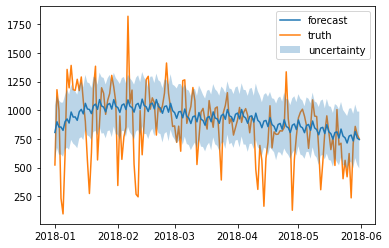

In [125]:
plt.plot(test_forecast["ds"], test_forecast["yhat"], label = "forecast")
plt.plot(test_forecast["ds"], test_forecast["truth"], label = "truth", zorder = 0)
plt.fill_between(test_forecast["ds"], test_forecast["yhat_upper"], test_forecast["yhat_lower"], label ="uncertainty", alpha = 0.3)
plt.legend()

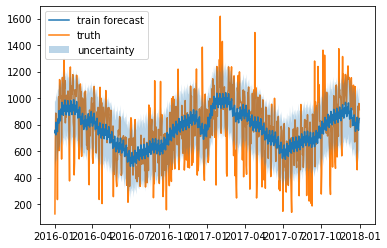

In [126]:
plt.plot(train_forecast["ds"], train_forecast["yhat"], label = "train forecast")
plt.plot(train_forecast["ds"], train_forecast["truth"], label = "truth", zorder = 0)
plt.fill_between(train_forecast["ds"], train_forecast["yhat_upper"], train_forecast["yhat_lower"], label ="uncertainty", alpha = 0.3)
plt.legend()